In [33]:
folder_path = r"C:\Python\shoes\train"

In [34]:
#import libraries
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [35]:
#get Label and images_path
def get_label(folder_path):
    labels = os.listdir(folder_path)
    labels_img_dict = dict.fromkeys(labels)
    for labels in labels_img_dict.keys():
        imgs = os.listdir(os.path.join(folder_path, labels))
        images_path =[]
        for img in imgs:
            img_path = os.path.join(folder_path, labels,img)
            images_path.append(img_path)
        labels_img_dict[labels]=images_path
    return labels_img_dict

In [36]:
#Call the function
get_label(folder_path)

{'adidas': ['C:\\Python\\shoes\\train\\adidas\\100.jpg',
  'C:\\Python\\shoes\\train\\adidas\\101.jpg',
  'C:\\Python\\shoes\\train\\adidas\\102.jpg',
  'C:\\Python\\shoes\\train\\adidas\\103.jpg',
  'C:\\Python\\shoes\\train\\adidas\\104.jpg',
  'C:\\Python\\shoes\\train\\adidas\\105.jpg',
  'C:\\Python\\shoes\\train\\adidas\\106.jpg',
  'C:\\Python\\shoes\\train\\adidas\\107.jpg',
  'C:\\Python\\shoes\\train\\adidas\\108.jpg',
  'C:\\Python\\shoes\\train\\adidas\\109.jpg',
  'C:\\Python\\shoes\\train\\adidas\\110.jpg',
  'C:\\Python\\shoes\\train\\adidas\\111.jpg',
  'C:\\Python\\shoes\\train\\adidas\\112.jpg',
  'C:\\Python\\shoes\\train\\adidas\\113.jpg',
  'C:\\Python\\shoes\\train\\adidas\\114.jpg',
  'C:\\Python\\shoes\\train\\adidas\\115.jpg',
  'C:\\Python\\shoes\\train\\adidas\\116.jpg',
  'C:\\Python\\shoes\\train\\adidas\\117.jpg',
  'C:\\Python\\shoes\\train\\adidas\\118.jpg',
  'C:\\Python\\shoes\\train\\adidas\\119.jpg',
  'C:\\Python\\shoes\\train\\adidas\\120.jpg',
  '

In [37]:
img_dict=get_label(folder_path)

In [ ]:
#convert image dictionary in to dataframe
img_df = pd.DataFrame(img_dict)
img_df.head()

,adidas,converse,nike
0,C:\Python\shoes\train\adidas\100.jpg,C:\Python\shoes\train\converse\100.jpg,C:\Python\shoes\train\nike\100.jpg
1,C:\Python\shoes\train\adidas\101.jpg,C:\Python\shoes\train\converse\101.jpg,C:\Python\shoes\train\nike\101.jpg
2,C:\Python\shoes\train\adidas\102.jpg,C:\Python\shoes\train\converse\102.jpg,C:\Python\shoes\train\nike\102.jpg
3,C:\Python\shoes\train\adidas\103.jpg,C:\Python\shoes\train\converse\103.jpg,C:\Python\shoes\train\nike\103.jpg
4,C:\Python\shoes\train\adidas\104.jpg,C:\Python\shoes\train\converse\104.jpg,C:\Python\shoes\train\nike\104.jpg


In [39]:
img_df.to_csv('images_path_df.csv',index=False)

# Data Processing 

In [40]:
img_df.head()

,adidas,converse,nike
0,C:\Python\shoes\train\adidas\100.jpg,C:\Python\shoes\train\converse\100.jpg,C:\Python\shoes\train\nike\100.jpg
1,C:\Python\shoes\train\adidas\101.jpg,C:\Python\shoes\train\converse\101.jpg,C:\Python\shoes\train\nike\101.jpg
2,C:\Python\shoes\train\adidas\102.jpg,C:\Python\shoes\train\converse\102.jpg,C:\Python\shoes\train\nike\102.jpg
3,C:\Python\shoes\train\adidas\103.jpg,C:\Python\shoes\train\converse\103.jpg,C:\Python\shoes\train\nike\103.jpg
4,C:\Python\shoes\train\adidas\104.jpg,C:\Python\shoes\train\converse\104.jpg,C:\Python\shoes\train\nike\104.jpg


In [41]:
#process the image
def image_process(img):
    img_pil = Image.open(img)
    img_ary = np.array(img_pil)
    img_flat = img_ary.flatten()
    df_t = pd.DataFrame(img_flat).T
    return df_t

In [42]:
cols=img_df.columns

In [43]:
df_k = pd.DataFrame()

In [44]:
import numpy as np

In [45]:
for label in cols:
    images = img_df[label]
    #df_t = pd.DataFrame()
    for image in images:
        df_x = image_process(image)
        df_x['shoes']=label
        df_k = pd.concat([df_k,df_x])

In [46]:
df_k.head()

,0,1,2,3,4,5,6,7,8,9,...,172791,172792,172793,172794,172795,172796,172797,172798,172799,shoes
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,adidas
0,241,245,246,241,245,246,244,245,247,244,...,156,156,156,156,156,156,156,156,156,adidas
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,adidas
0,237,239,238,237,239,238,237,239,238,237,...,237,238,240,237,238,240,237,238,240,adidas
0,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,241,241,241,241,241,adidas


In [47]:
df_k.shoes.unique()

array(['adidas', 'converse', 'nike'], dtype=object)

In [48]:
df_k.index = range(len(df_k))


In [49]:
df_k.head()

,0,1,2,3,4,5,6,7,8,9,...,172791,172792,172793,172794,172795,172796,172797,172798,172799,shoes
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,adidas
1,241,245,246,241,245,246,244,245,247,244,...,156,156,156,156,156,156,156,156,156,adidas
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,adidas
3,237,239,238,237,239,238,237,239,238,237,...,237,238,240,237,238,240,237,238,240,adidas
4,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,241,241,241,241,241,adidas


In [50]:
#save the df_k
df_k.to_csv('image_array_kathford.csv',index= False)

In [51]:
#Train the model
data= df_k.copy()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,172791,172792,172793,172794,172795,172796,172797,172798,172799,shoes
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,adidas
1,241,245,246,241,245,246,244,245,247,244,...,156,156,156,156,156,156,156,156,156,adidas
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,adidas
3,237,239,238,237,239,238,237,239,238,237,...,237,238,240,237,238,240,237,238,240,adidas
4,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,241,241,241,241,241,adidas


In [52]:
#Split X and Y
X = data.drop('shoes', axis=1)
y = data['shoes']

In [53]:
# Data processing

In [27]:
#Load data
data = pd.read_csv('image_array_kathford.csv')

In [28]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,172791,172792,172793,172794,172795,172796,172797,172798,172799,shoes
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,adidas
1,241,245,246,241,245,246,244,245,247,244,...,156,156,156,156,156,156,156,156,156,adidas
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,adidas
3,237,239,238,237,239,238,237,239,238,237,...,237,238,240,237,238,240,237,238,240,adidas
4,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,241,241,241,241,241,adidas


In [29]:
# import classifiers 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [30]:
# Create model 
model_dict={
    'lr_model': LogisticRegression(),
    'svc_model': SVC(),
    'rf_model': RandomForestClassifier(),
    'dt_model': DecisionTreeClassifier(),
    'knn_model': KNeighborsClassifier()
}

In [31]:
# Get train and test data
X=data.drop('shoes', axis=1)

In [64]:
y=data.shoes

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [56]:
#import axxuracy
from sklearn.metrics import accuracy_score

In [57]:
acc_s = list()

In [58]:
# Train the model
for name, model in model_dict.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ac = accuracy_score(y_test, y_pred)
    acc_s.append(ac)

c:\Python\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


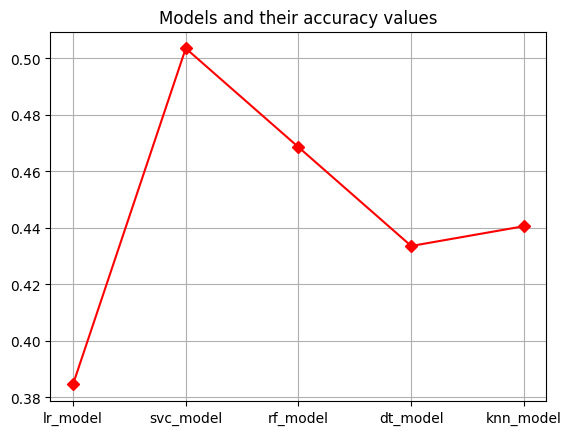

In [59]:
#PLot model and accuracy score
plt.title("Models and their accuracy values")
plt.plot(model_dict.keys(), acc_s, marker='D', color='red')
plt.grid()

In [60]:
# since 'svc_models' gives the best accuracy we will use the 'svc_models'
svc_m = SVC()

In [61]:
svc_m.fit(X_train, y_train)

SVC()

In [62]:
# model save
import joblib

In [63]:
joblib.dump(svc_m, 'model_kathford.pt')

['model_kathford.pt']